#References
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet



#Supervised Learning

#Linear Regression

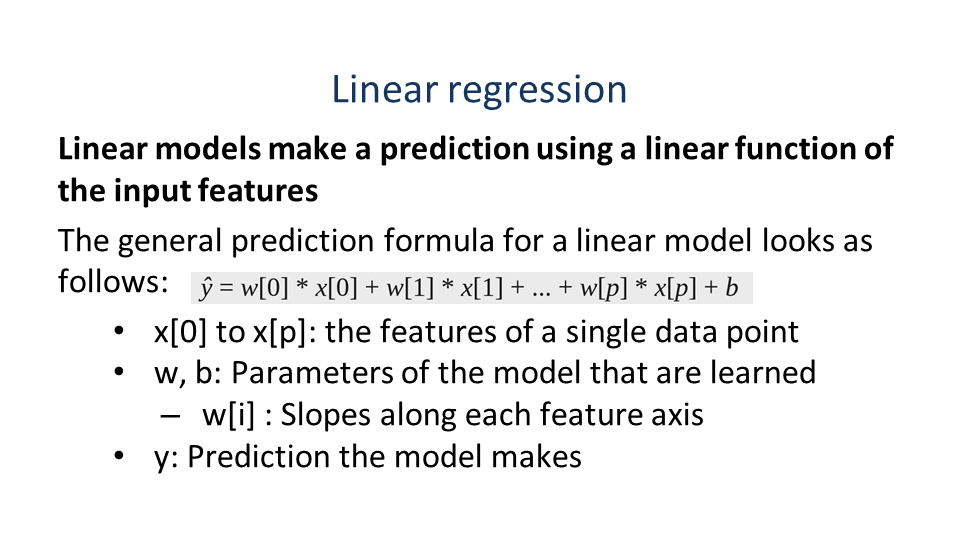

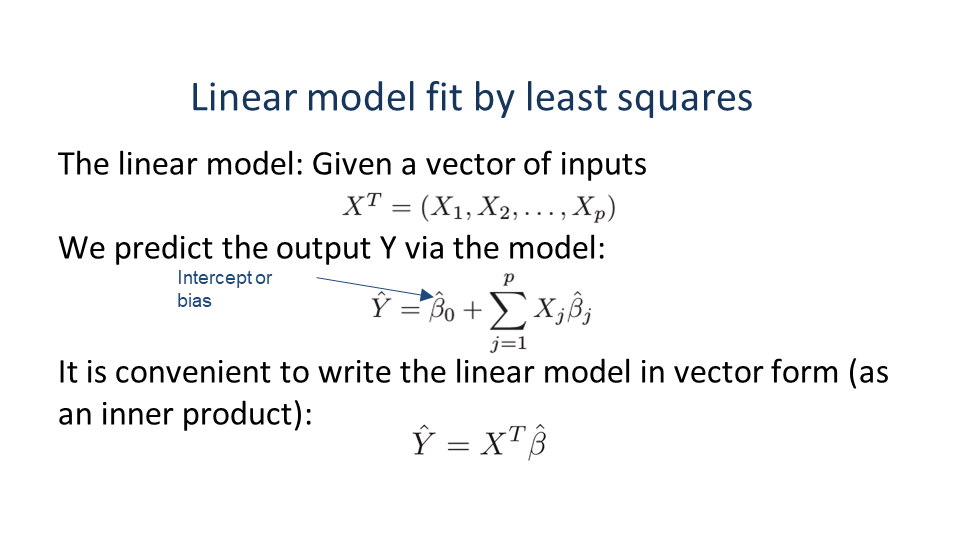

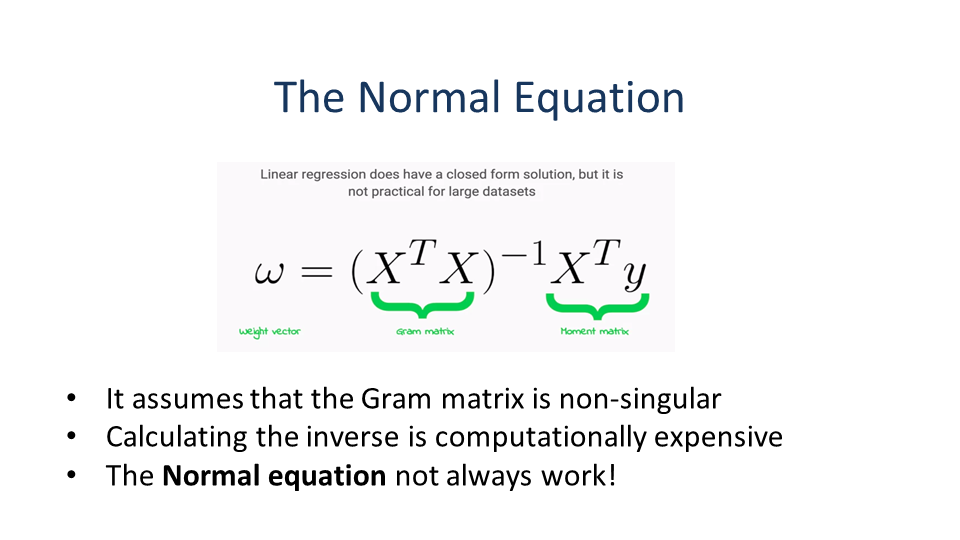

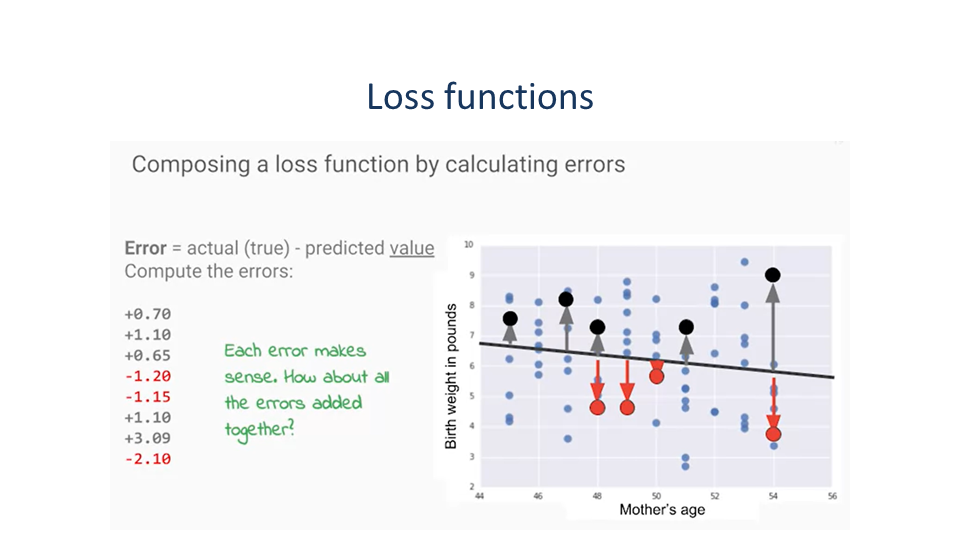

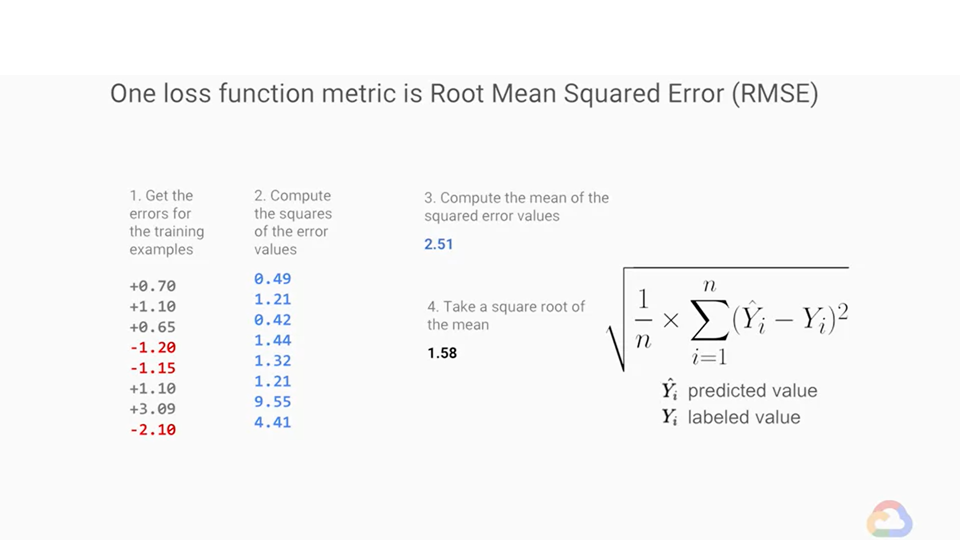

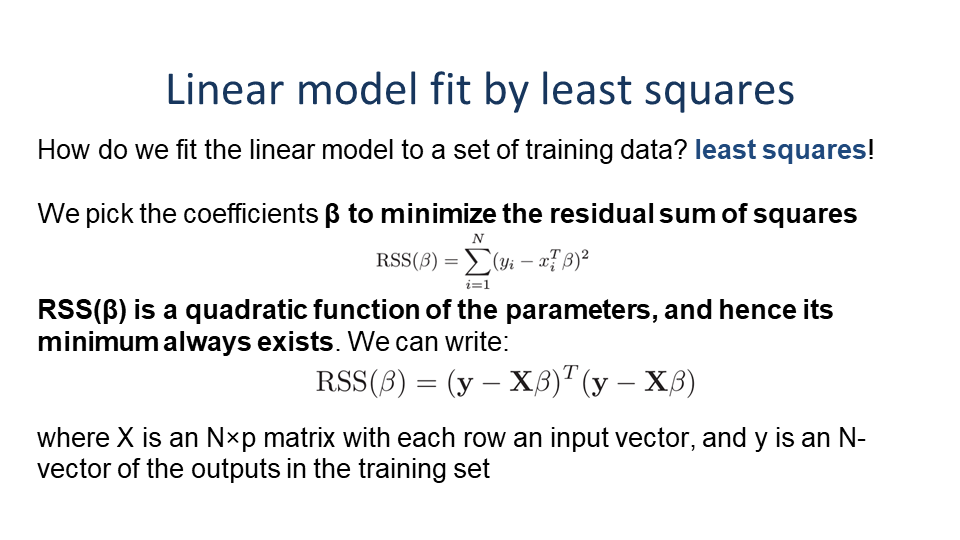

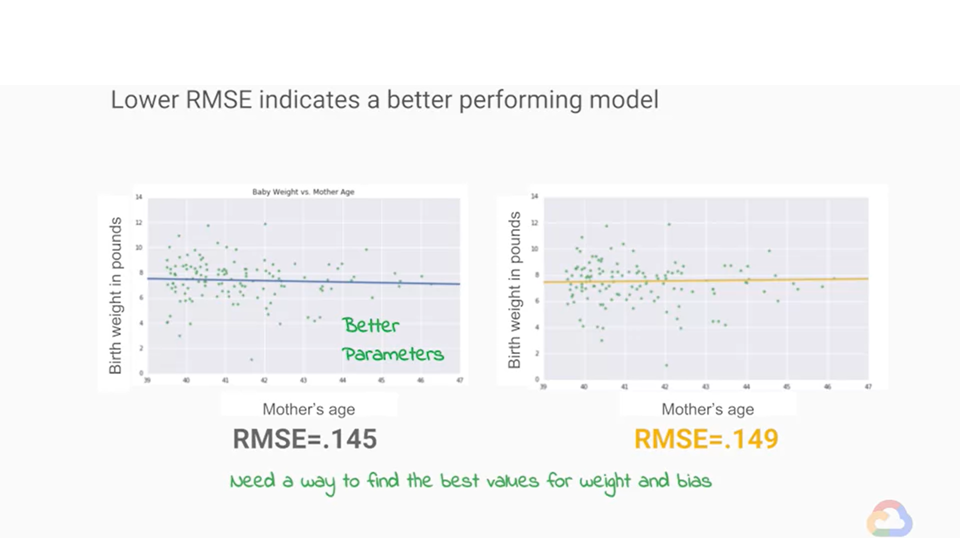

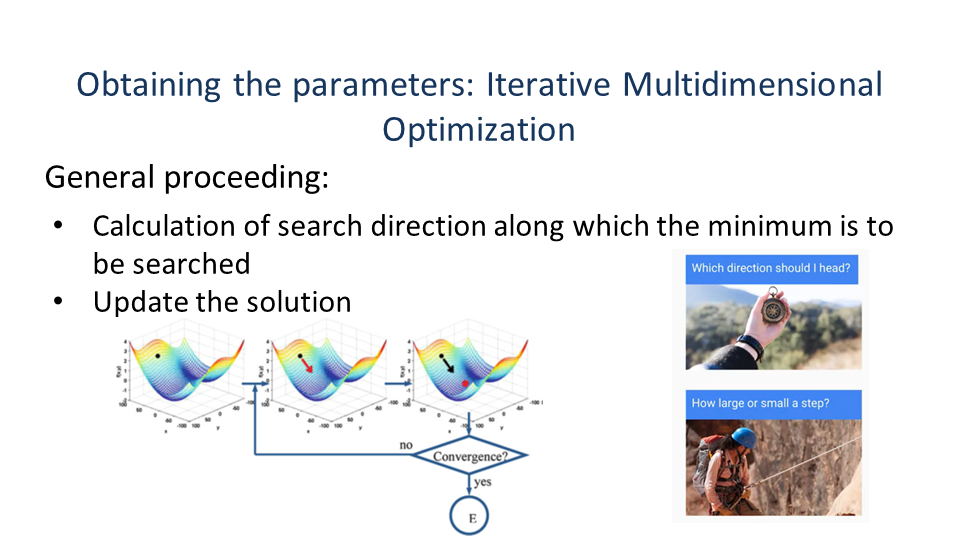

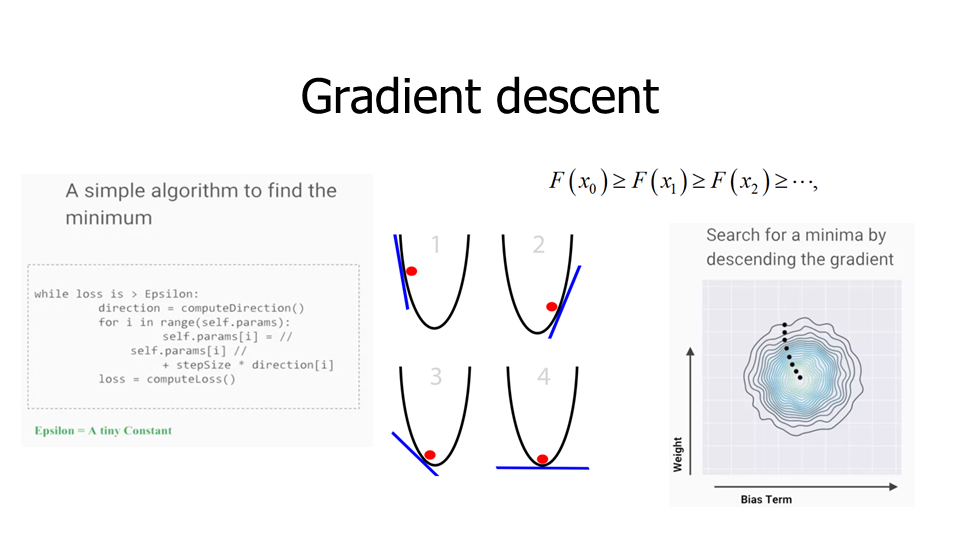

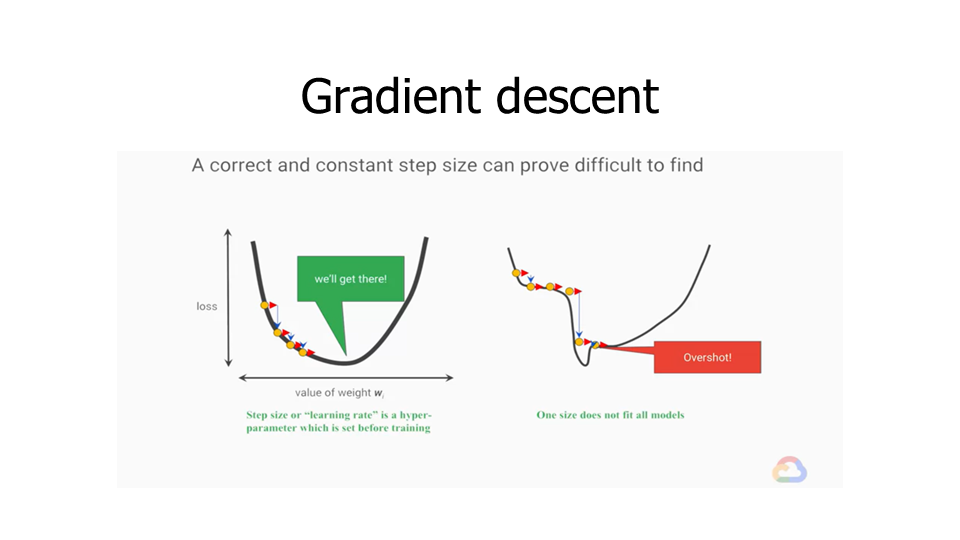

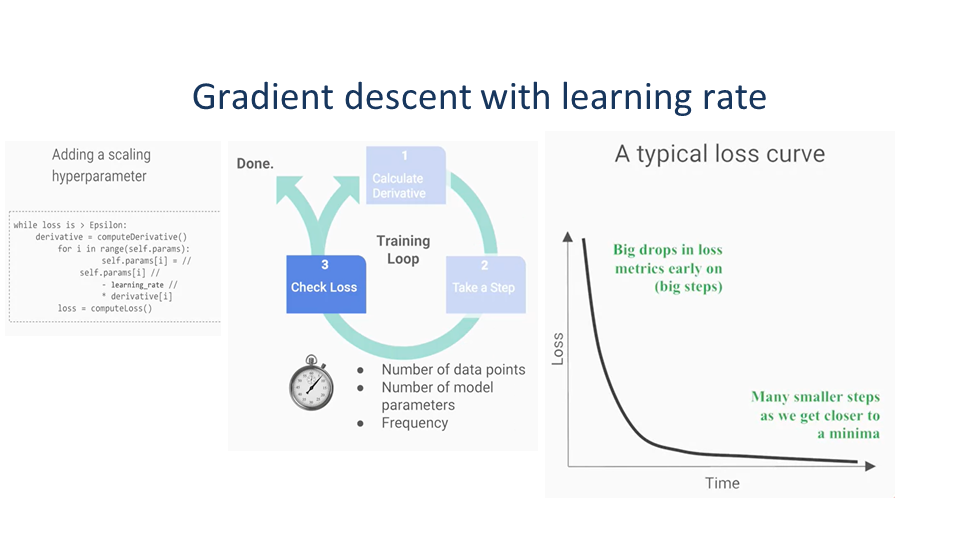

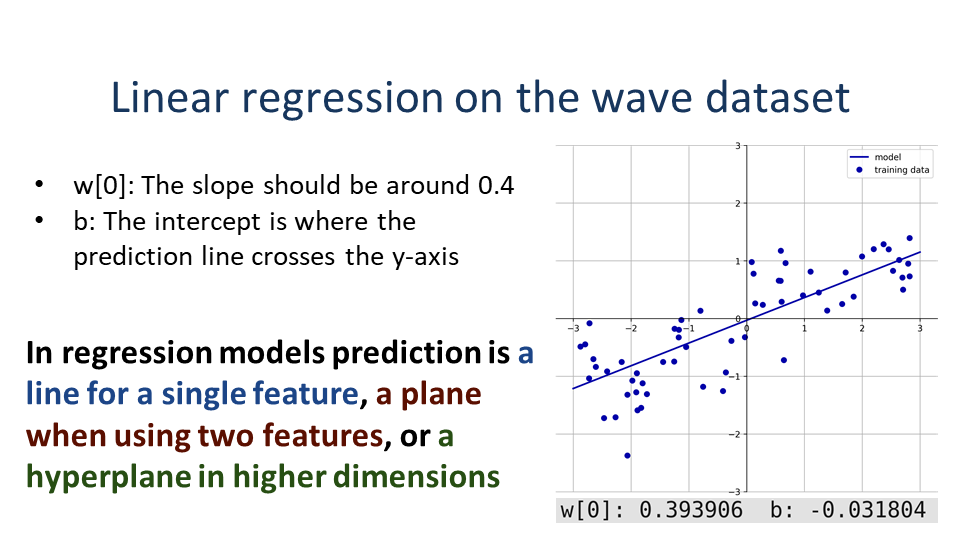

##Simple Linear Regression

In [ ]:
!pip install joblib==1.1.0
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 6.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=1b8338cb9bc485a96ce362df670e7747a399c9038d7f5d45622487033f252919
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

w[0]: 0.393906  b: -0.031804


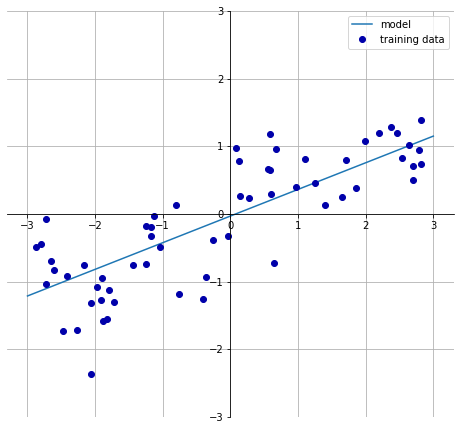

In [ ]:
mglearn.plots.plot_linear_regression_wave()

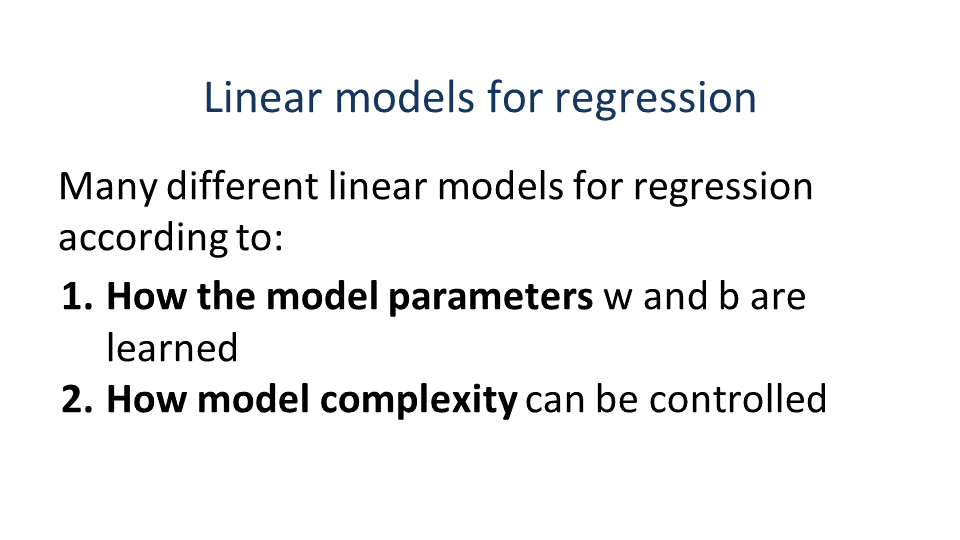

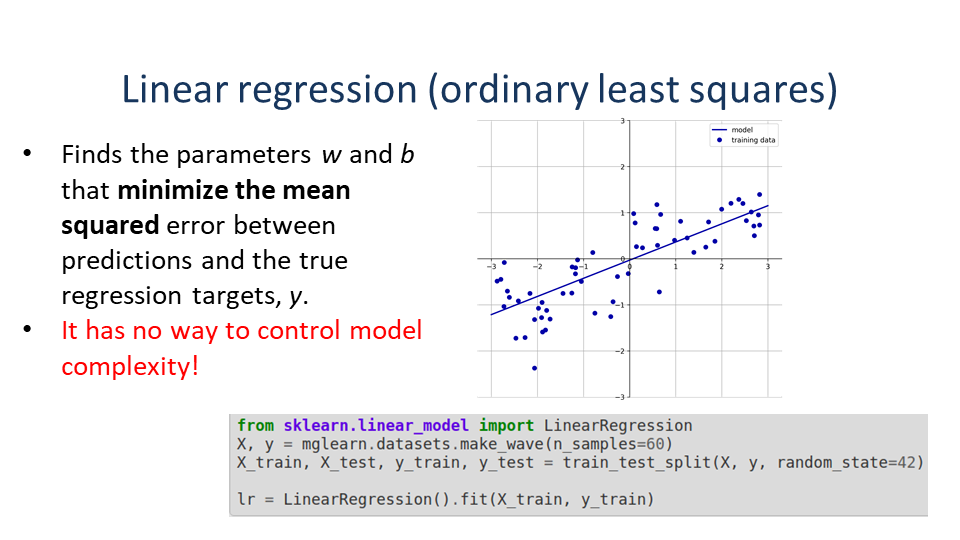

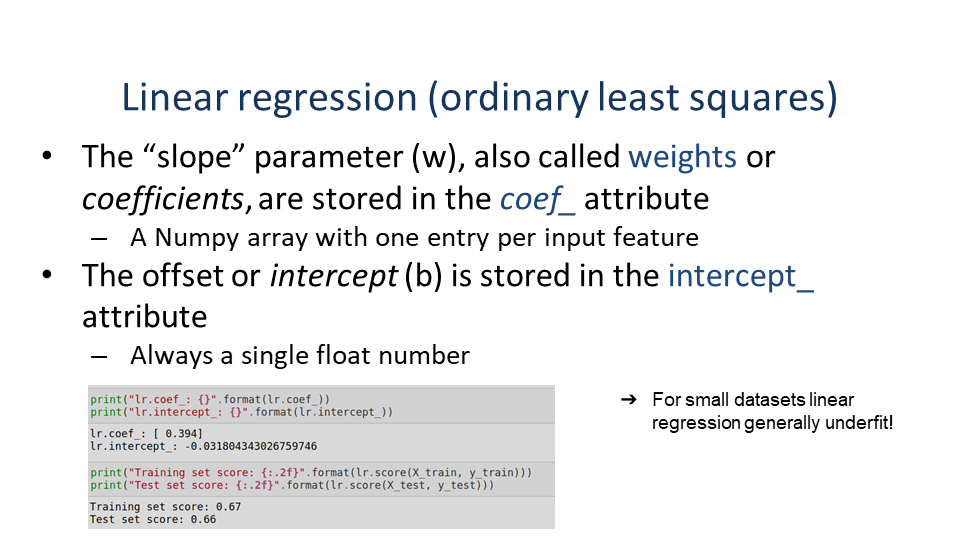

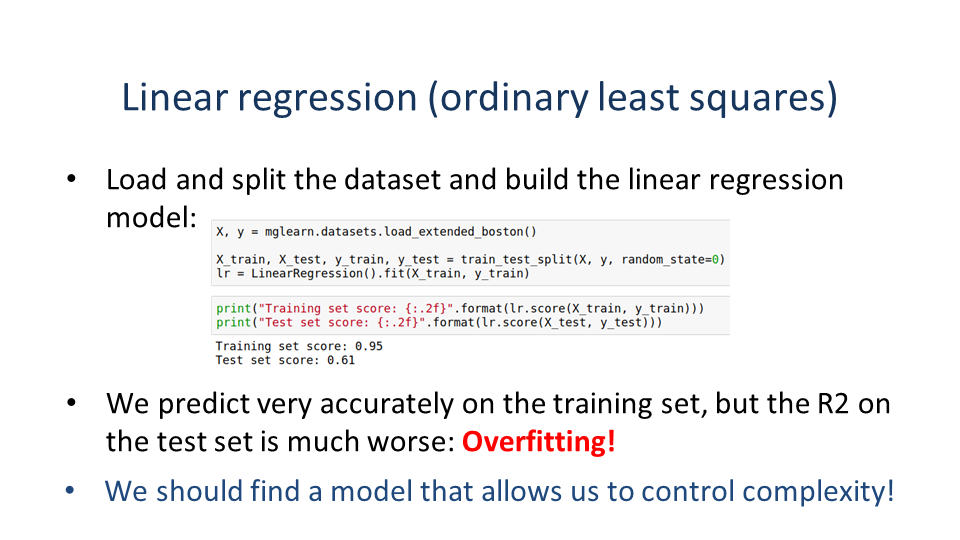

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.44477649]
lr.intercept_: 0.04159949836954641
Training set score: 0.60
Test set score: 0.65


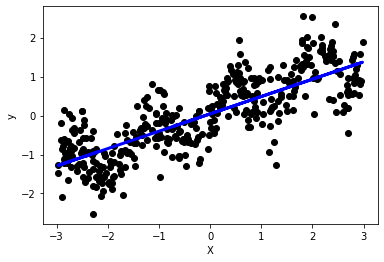

In [ ]:
y_pred = lr.predict(X_test)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

##Ridge Regression

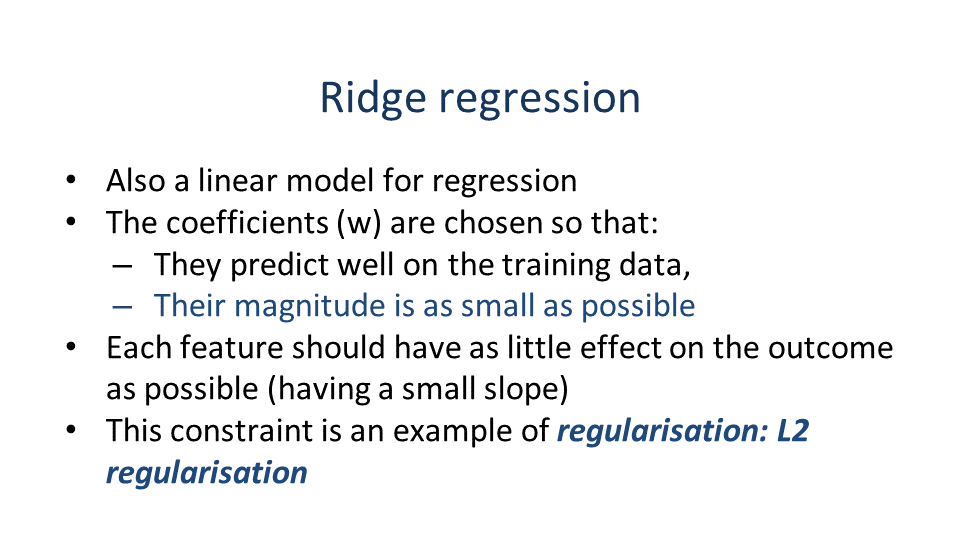

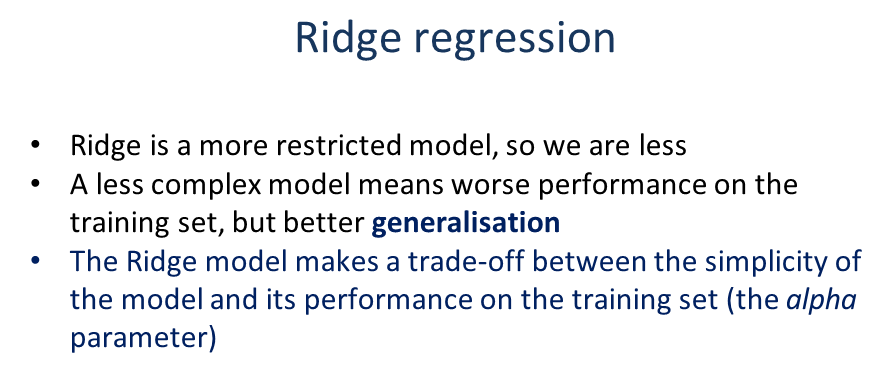

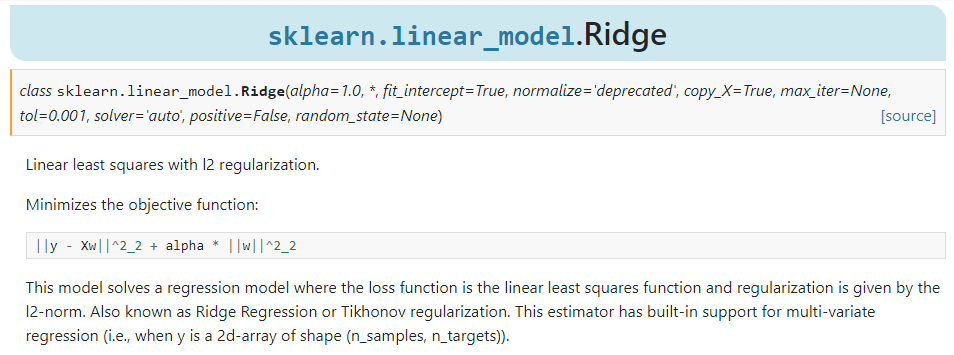

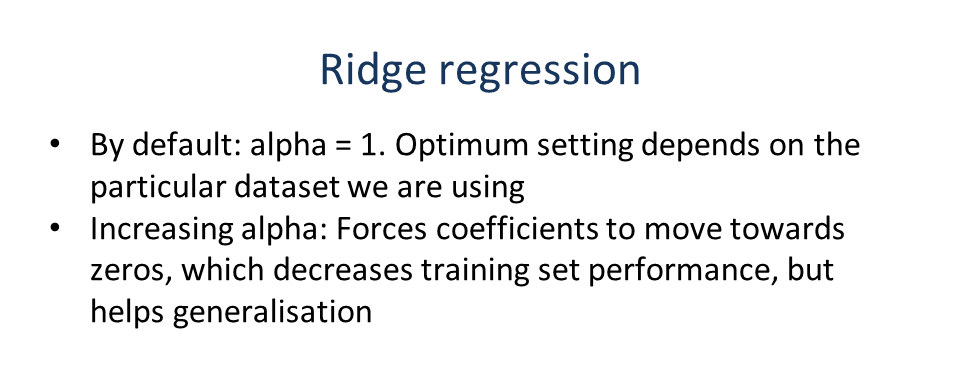

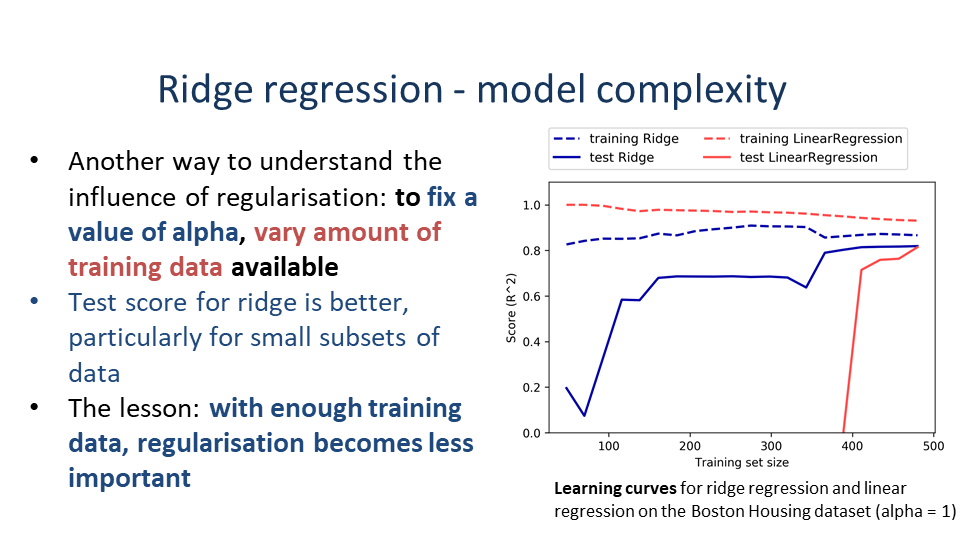

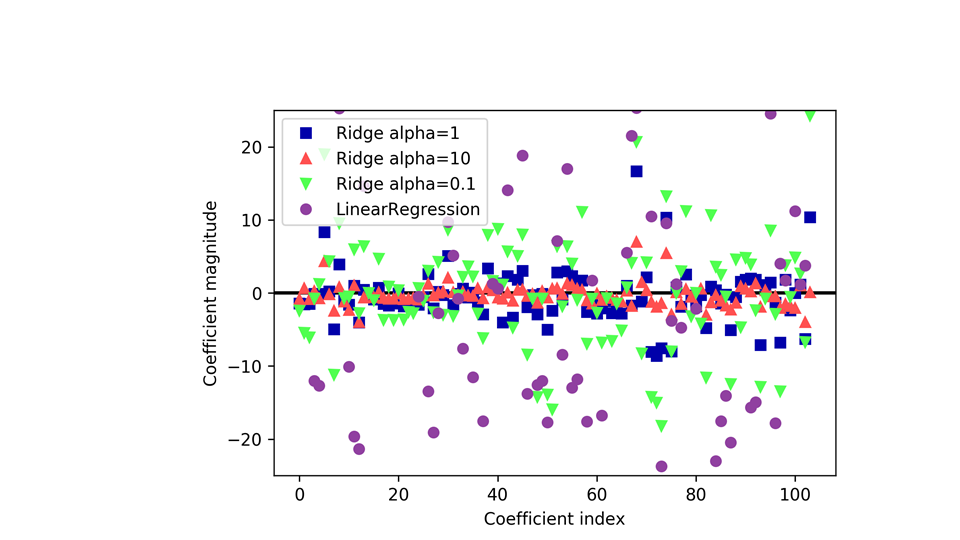

lr.coef_: [0.00805368]
lr.intercept_: 0.03867942195296081
Training set score: 0.02
Test set score: 0.02


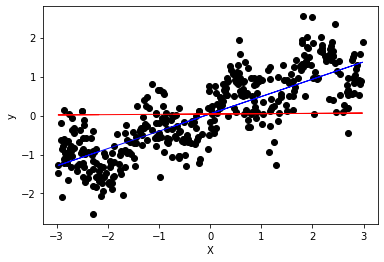

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100000).fit(X_train, y_train)
y_predr = ridge.predict(X_test)
print("lr.coef_: {}".format(ridge.coef_))
print("lr.intercept_: {}".format(ridge.intercept_))
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=1)
plt.plot(X_test, y_predr, '-', color='red', linewidth=1)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

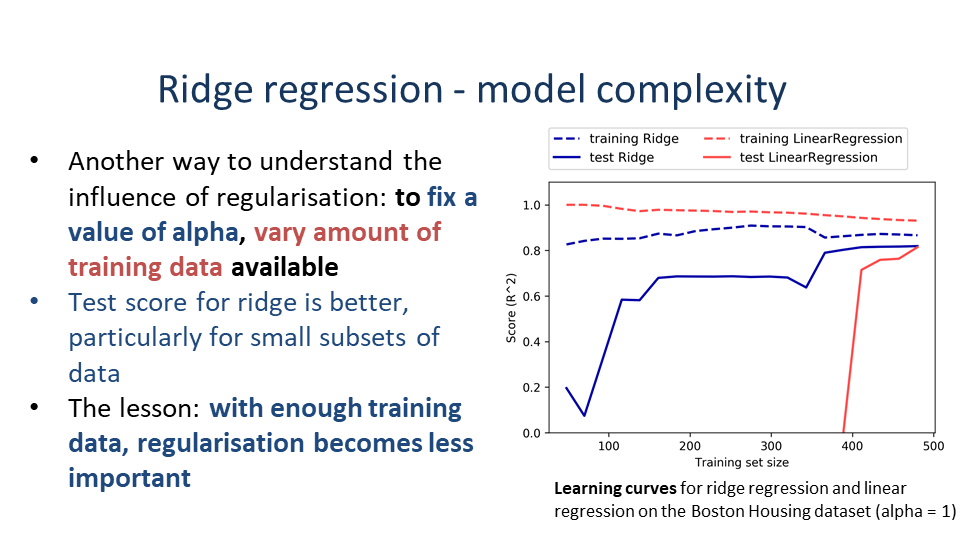

##Lasso Regression

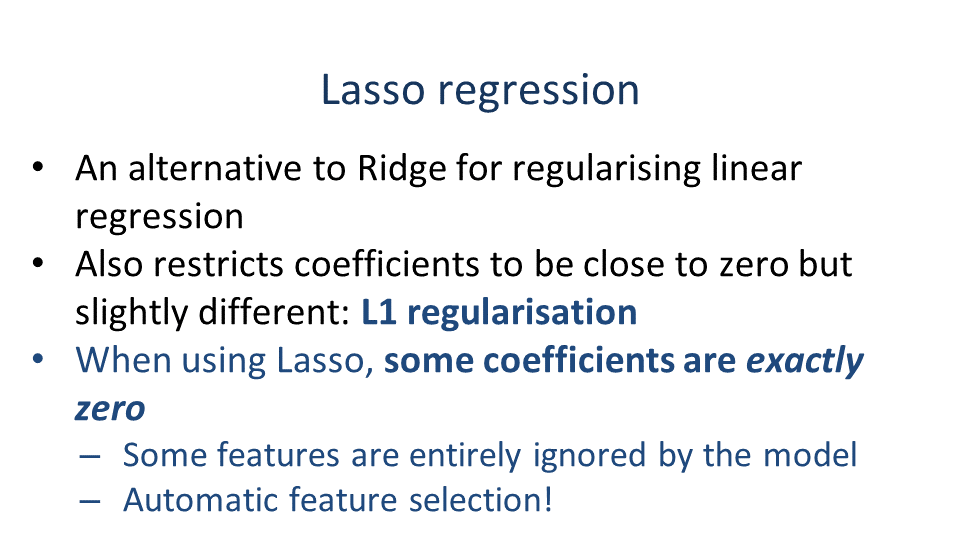

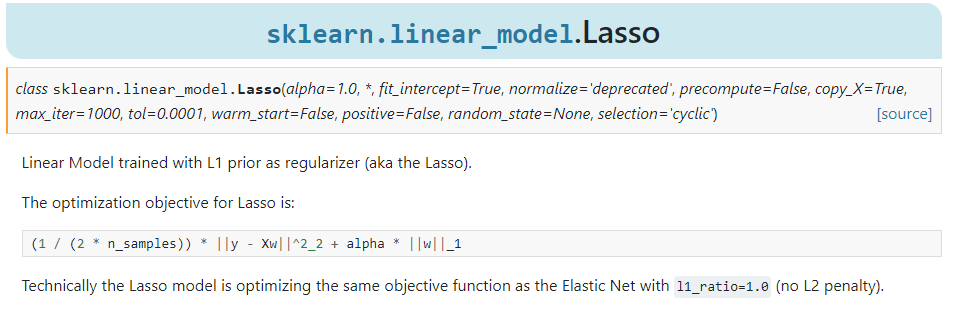

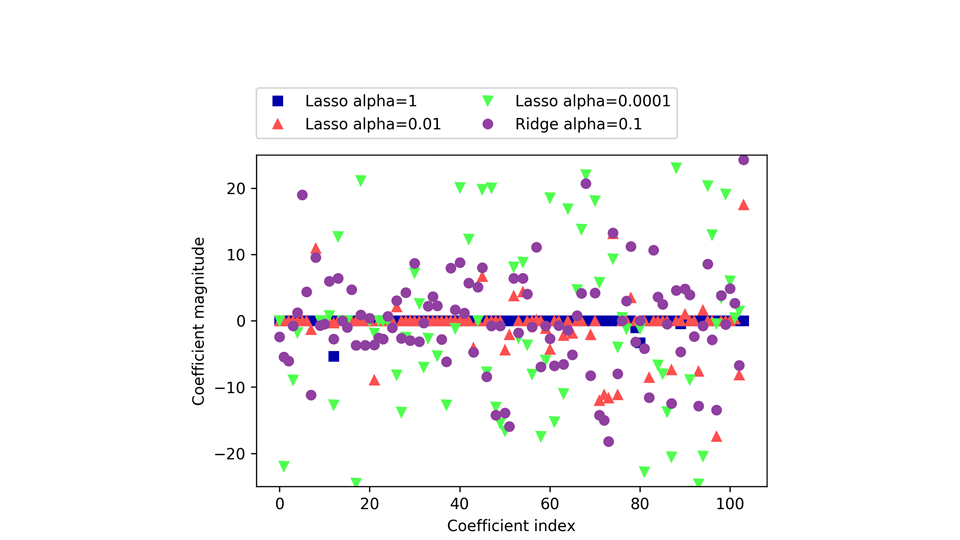

Training set score: 0.00
Test set score: -0.00


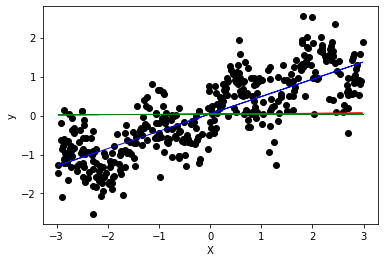

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10).fit(X_train, y_train)
y_predl = lasso.predict(X_test)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=1)
plt.plot(X_test, y_predr, '-', color='red', linewidth=1)
plt.plot(X_test, y_predl, color='green', linewidth=1)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

##Elastic Net


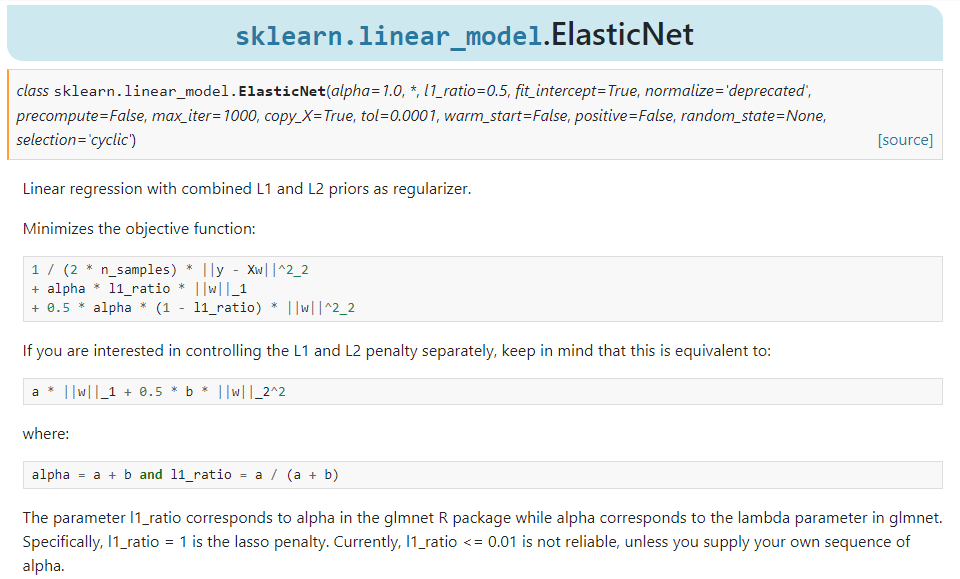

##Regression Example

This is a dataset used for regression. The sklearn source is:
https://scikit-learn.org/stable/datasets/toy_dataset.html

Which points to this source:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

And the original paper that explains the first use of the data:
https://www.jstor.org/stable/3448465

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.




In [ ]:
#df_names=["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_ecg", "maximum_heart_rate", "exercise_induced_angina", "ST_depression_exercise", "slope_exercise_ST", "major_vessels_colored", "thallium_scintigraphic_defect", "angiographic_disease_status"
#
url_data = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df = pd.read_csv(url_data, delimiter="\t")
display(df)

AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]

In [ ]:
df.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

In [ ]:
X=df.values[:,:10]
y=df.values[:,10]
print(X)
print(X.shape)
print(y)
print(y.shape)

[[59.      2.     32.1    ...  4.      4.8598 87.    ]
 [48.      1.     21.6    ...  3.      3.8918 69.    ]
 [72.      2.     30.5    ...  4.      4.6728 85.    ]
 ...
 [60.      2.     24.9    ...  3.77    4.1271 95.    ]
 [36.      1.     30.     ...  4.79    5.1299 85.    ]
 [36.      1.     19.6    ...  3.      4.5951 92.    ]]
(442, 10)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print(lr.coef_)

[-1.57150837e-01 -1.98903997e+01  6.39580742e+00  1.04280859e+00
 -7.70796325e-01  4.09296837e-01 -3.26441531e-02  5.01603368e+00
  6.40994172e+01  1.17427786e-01]


In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.56
Test set score: 0.36


In [ ]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.56
Test set score: 0.36


In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.56
Test set score: 0.36


Training set score: 0.55
Test set score: 0.35
[ -0.12949063 -17.24557847   6.69661392   1.03083085   0.29910417
  -0.56565739  -1.2350409    2.65632909  31.5250151    0.16415452]


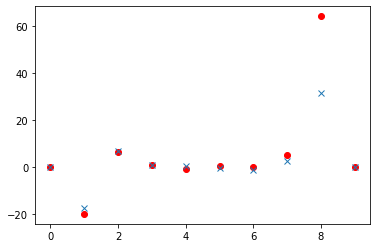

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
print(ridge10.coef_)
plt.plot([*range(10)],lr.coef_,'ro')
plt.plot([*range(10)],ridge10.coef_,'x')


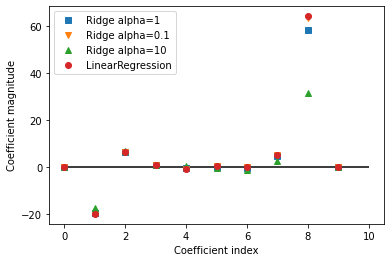

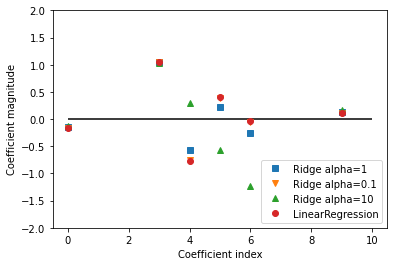

In [ ]:
plt.figure()
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
#plt.ylim(-5, 5)
plt.legend()

plt.figure()
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-2, 2)
plt.legend()

##Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print(lasso.coef_)

Training set score: 0.52
Test set score: 0.31
Number of features used: 7
[-0.0346998  -0.          6.80874709  0.91552319  1.27113441 -1.41811133
 -2.17712957  0.          0.          0.13318788]


In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.005, max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.56
Test set score: 0.36
Number of features used: 10


In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.56
Test set score: 0.36
Number of features used: 10


Text(0, 0.5, 'Coefficient magnitude')

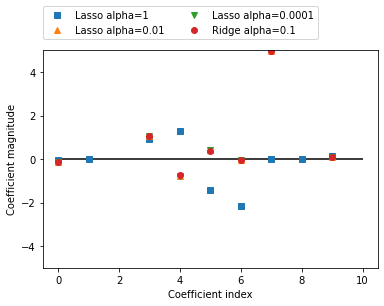

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.hlines(0, 0, len(lr.coef_))
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

##Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=1, l1_ratio=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(enet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(enet.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(enet.coef_ != 0)))

Training set score: 0.55
Test set score: 0.34
Number of features used: 9


#Linear Classification: Logistic Regression

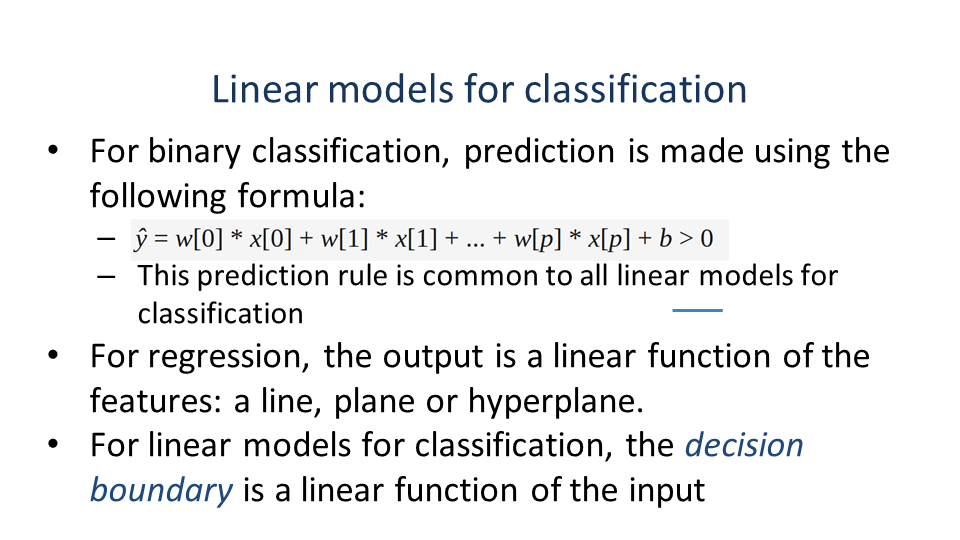

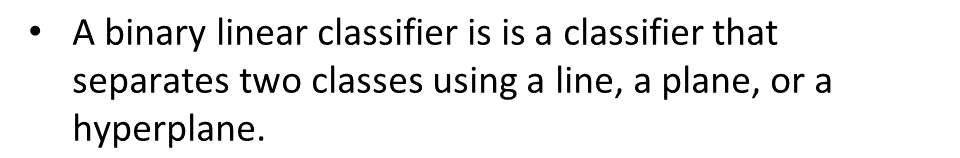

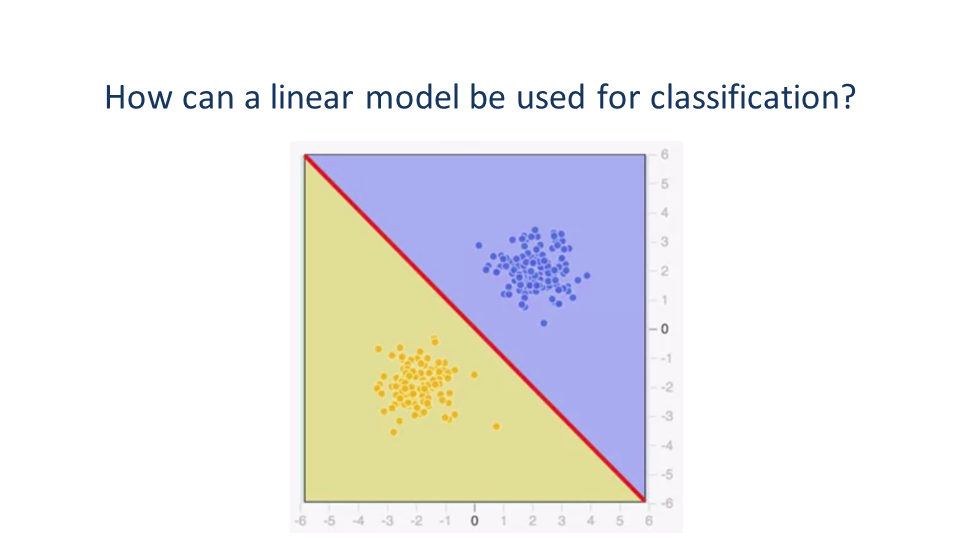

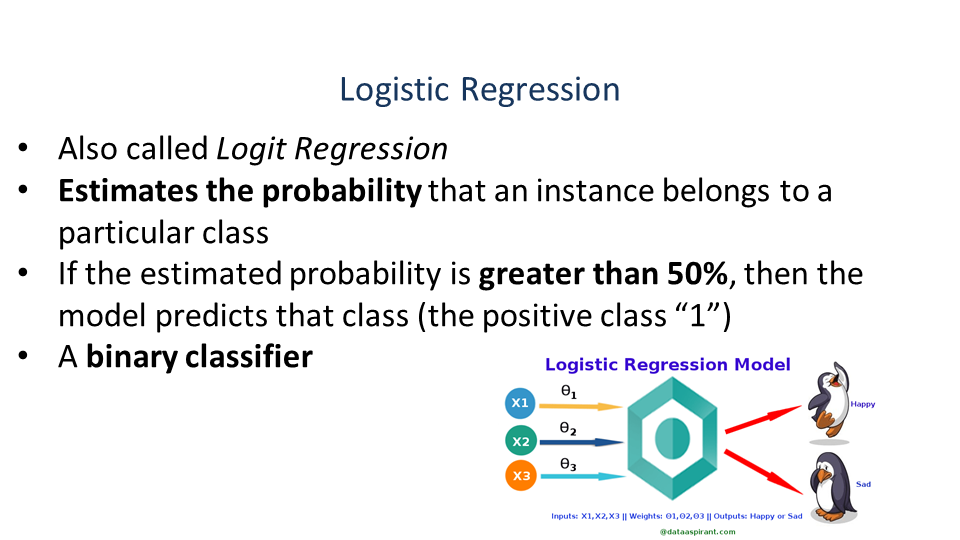

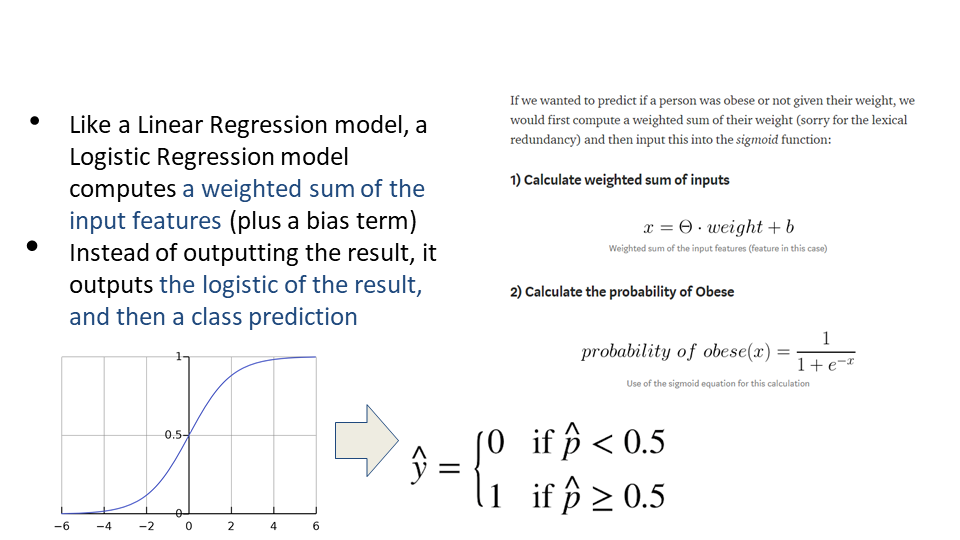

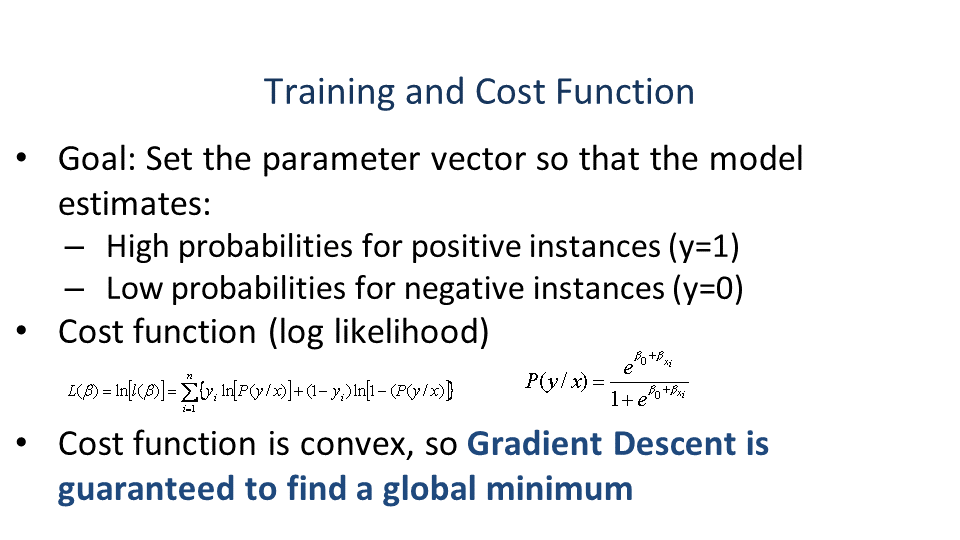

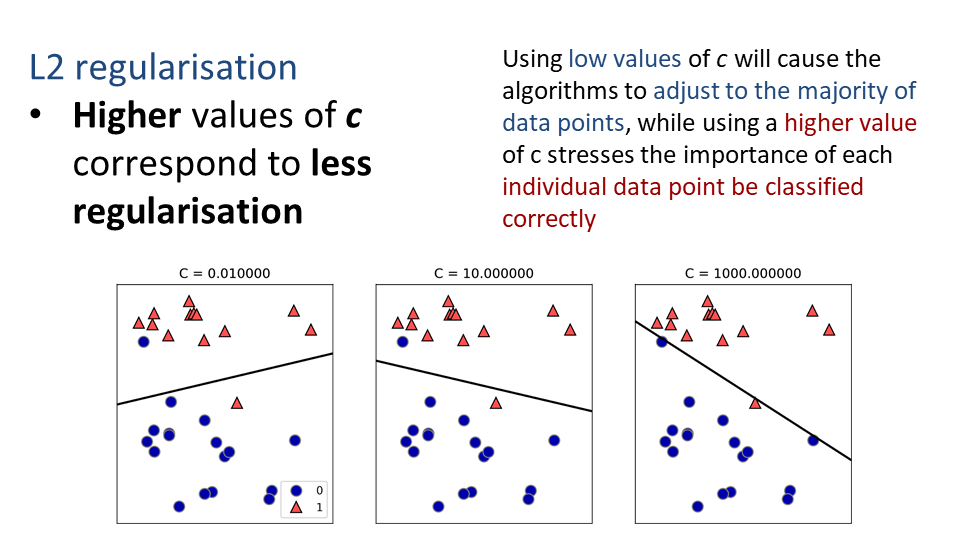

[[-0.35632092  1.26074392]]
[-0.47588494]
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


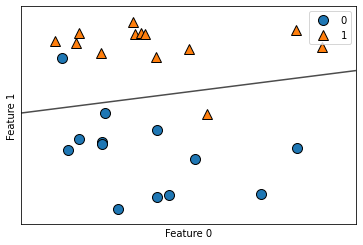

In [ ]:
from sklearn.linear_model import LogisticRegression

X, y = mglearn.datasets.make_forge()

clf = LogisticRegression(solver='saga', max_iter=100).fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend()
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print(clf.coef_)
print(clf.intercept_)
print(X)

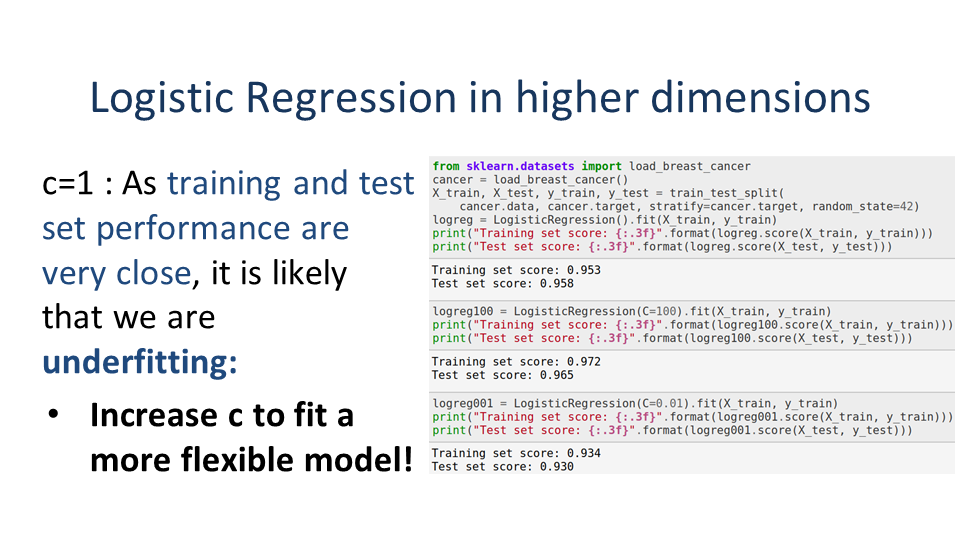

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(penalty='l1',solver='liblinear', max_iter=1000).fit(X_train, y_train)
C=0.1
#logreg = LogisticRegression(C=C, l1_ratio=1, penalty="elasticnet", solver='saga', max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print(logreg.coef_)

Training set score: 0.960
Test set score: 0.958
[[ 3.72927198  0.08134938 -0.16820561 -0.01233637  0.          0.
   0.          0.          0.          0.          0.          1.4339424
   0.         -0.09293534  0.          0.          0.          0.
   0.          0.          0.         -0.33006873 -0.05470603 -0.01712194
   0.          0.         -3.67061185  0.          0.          0.        ]]


Training accuracy of l1 logreg with C=0.010: 0.93
Test accuracy of l1 logreg with C=0.010: 0.93
Training accuracy of l1 logreg with C=1.000: 0.95
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.98
Test accuracy of l1 logreg with C=100.000: 0.97


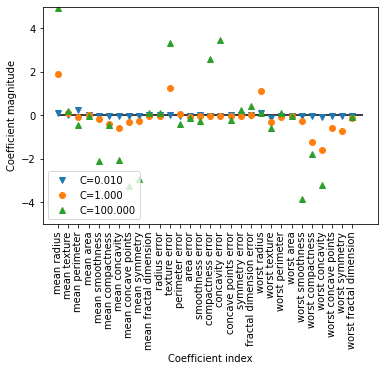

In [ ]:
for C, marker in zip([0.01, 1,  100], ['v', 'o', '^' ]):
  lr_l1 = LogisticRegression(C=C, penalty="l2", solver='liblinear').fit(X_train, y_train)
  print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
  C, lr_l1.score(X_train, y_train)))
  print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
  C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

##Logistic Regression for Multiclass Classification


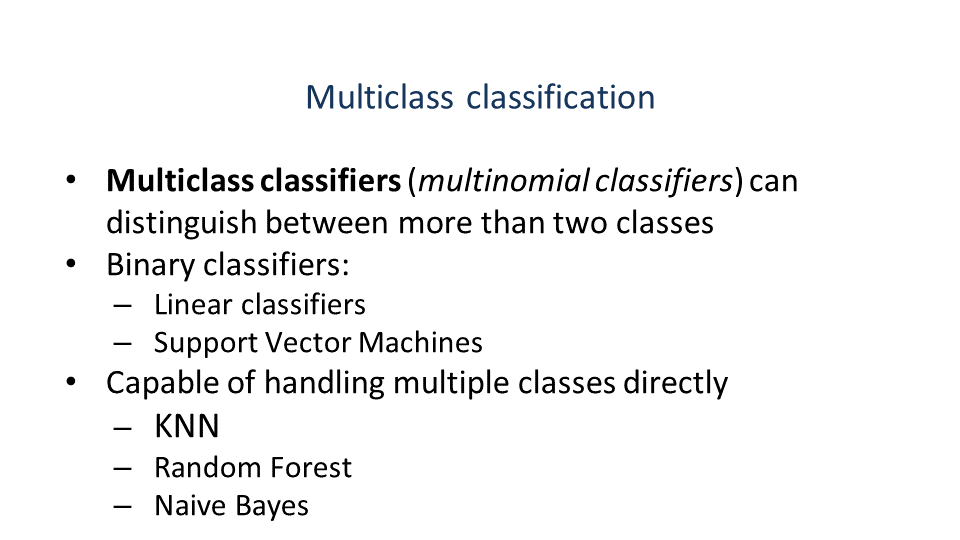

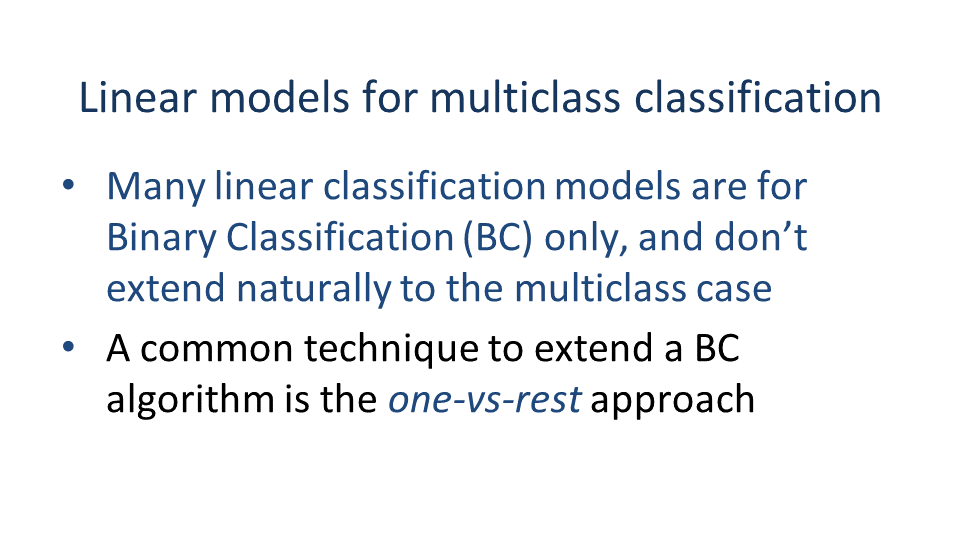

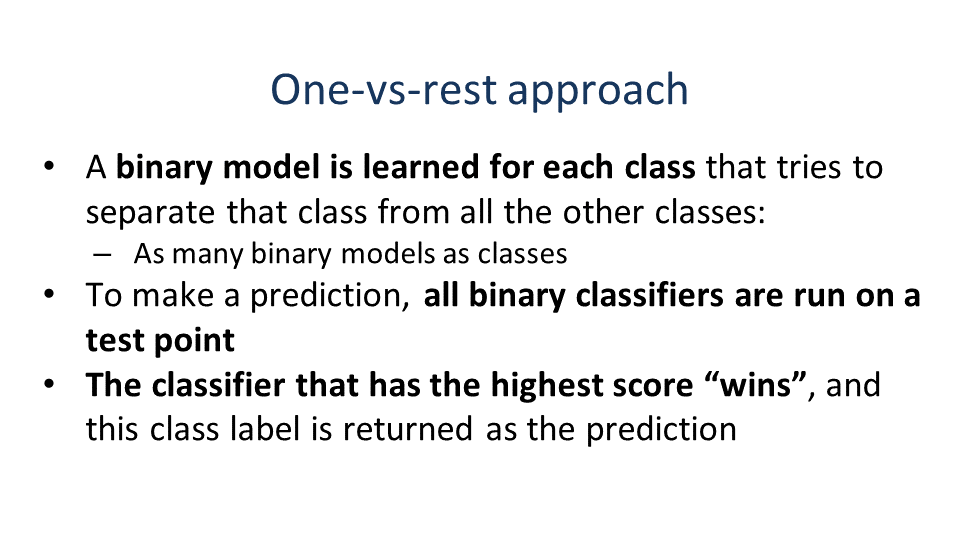

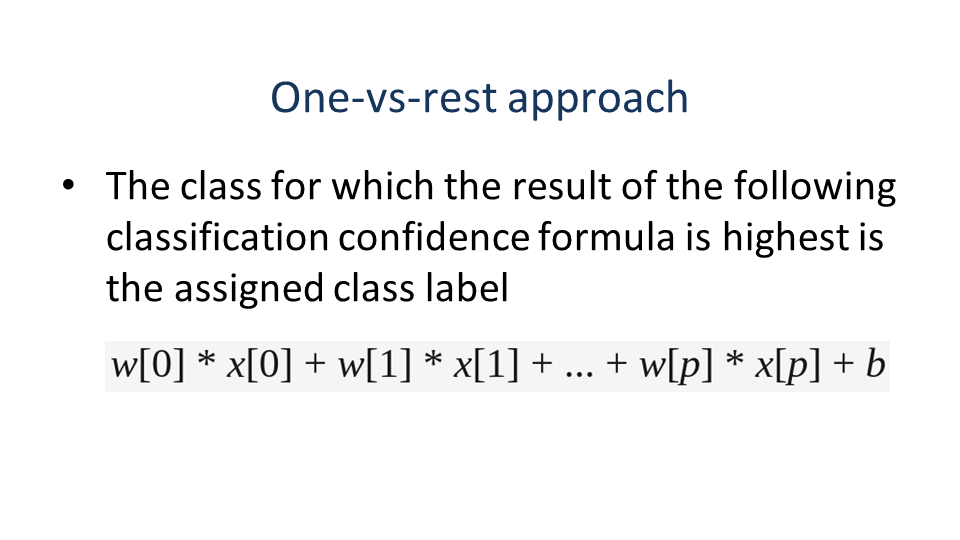

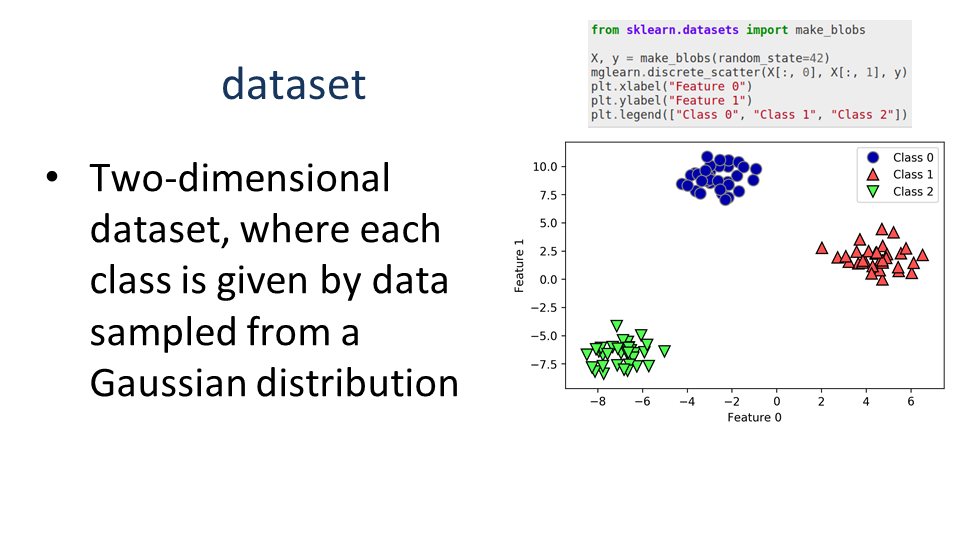

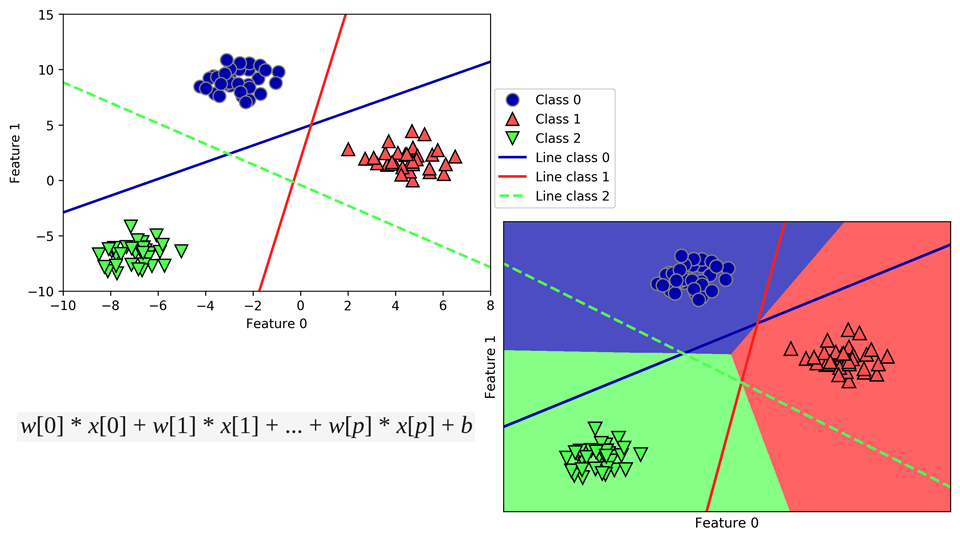

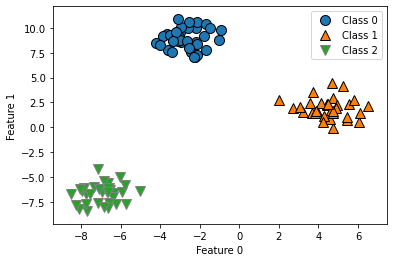

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])



In [ ]:
print(X)
print(y)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X, y)
print("Coefficient shape: ", lr.coef_.shape)
print(lr.coef_)
print("Intercept shape: ", lr.intercept_.shape)
print(lr.intercept_)

[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]
 [ 3.64934251  1.40687195]
 [-2.17793419  9.98983126]
 [ 4.42020695  2.33028226]
 [ 4.73695639  2.94181467]
 [-3.6601912   9.38998415]
 [-3.05358035  9.12520872]
 [-6.65216726 -5.57296684]
 [-6.35768563 -6.58312492]
 [-3.6155326   7.8180795 ]
 [-1.77073104  9.18565441]
 [-7.95051969 -6.39763718]
 [-6.60293639 -6.05292634]
 [-2.58120774 10.01781903]
 [-7.76348463 -6.72638449]
 [-6.40638957 -6.95293851]
 [-2.97261532  8.54855637]
 [-6.9567289  -6.53895762]
 [-7.32614214 -6.0237108 ]
 [-2.14780202 10.55232269]
 [-2.54502366 10.57892978]
 [-2.96983639 10.07140835]
 [ 3.22450809  1.55252436]
 [-6.25395984 -7.73726715]
 [-7.85430886 -6.09302499]
 [-8.1165779  -8.20056621]
 [-7.55965191 -6.6478559 ]
 [ 4.93599911  2.23422496]
 [ 4.44751787  2.27471703]
 [-5.72103161 -7.70079191]
 [-0.92998481  9.78172086]
 [-3.10983631  8.72259238]
 [-2.44166942  7.58953794]
 

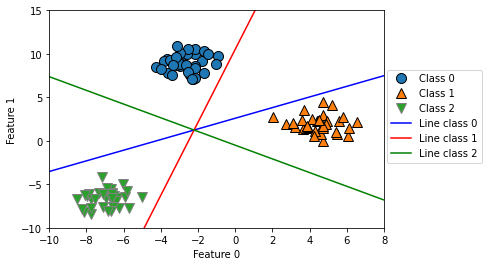

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lr.coef_, lr.intercept_,
['b', 'r', 'g']):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

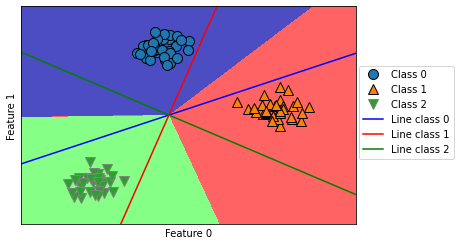

In [ ]:
mglearn.plots.plot_2d_classification(lr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lr.coef_, lr.intercept_,
['b', 'r', 'g']):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#Conclusions

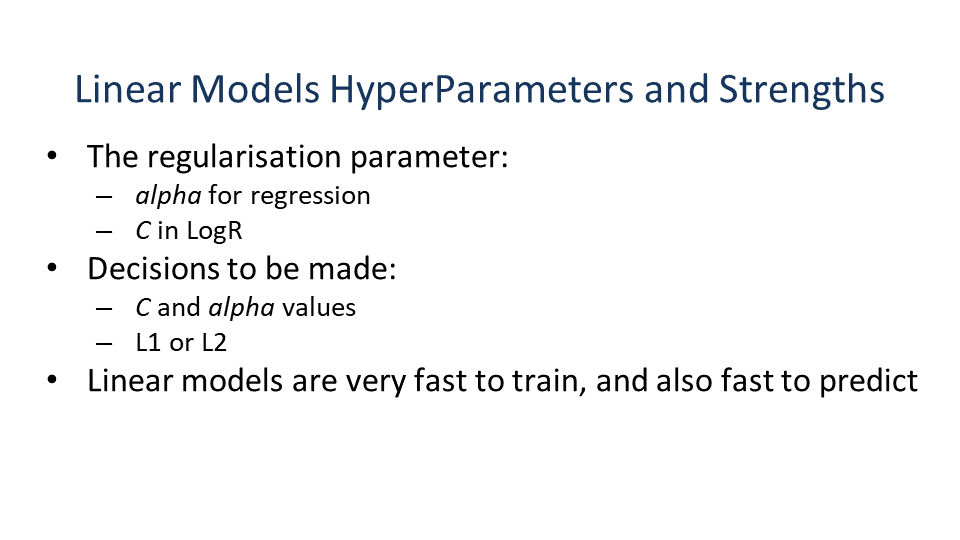